In [3]:
!pip install pandas matplotlib

C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\2719871927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=accident_count_by_district.index, y=accident_count_by_district.values, palette='viridis')


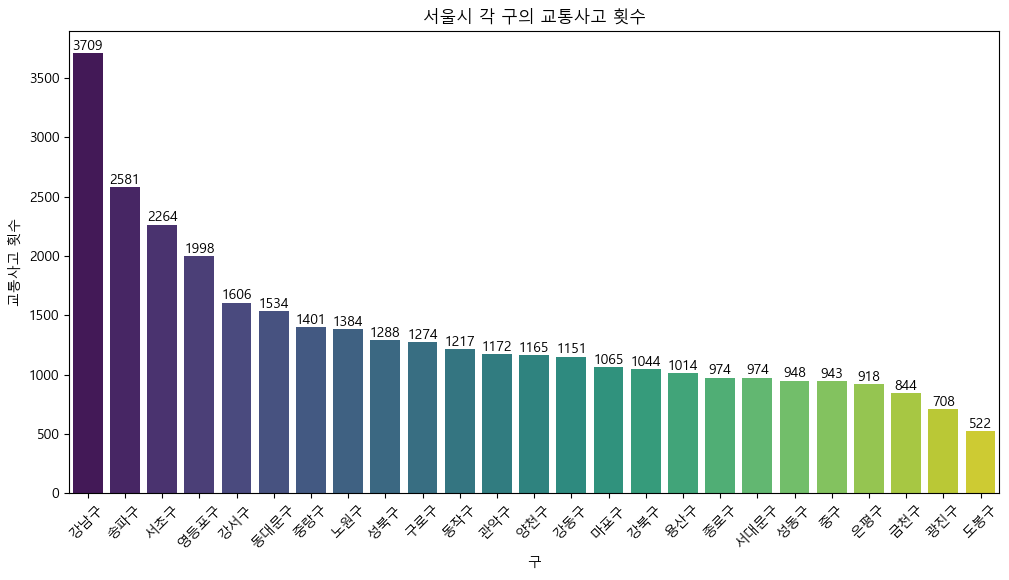

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '시'로 끝나는 부분만 추출
cities_ending_with_si = df['시군구'].str.extract(r'서울특별시\s*([가-힣]+구)')

# 각 구별 교통사고 횟수를 계산
accident_count_by_district = cities_ending_with_si[0].value_counts()

# 각 구별 교통사고 횟수를 bar plot으로 시각화
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=accident_count_by_district.index, y=accident_count_by_district.values, palette='viridis')

# 각 막대 위에 숫자 표기 (정수로 변환하여 표시)
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

plt.title('서울시 각 구의 교통사고 횟수')
plt.xlabel('구')
plt.ylabel('교통사고 횟수')
plt.xticks(rotation=45)
plt.show()


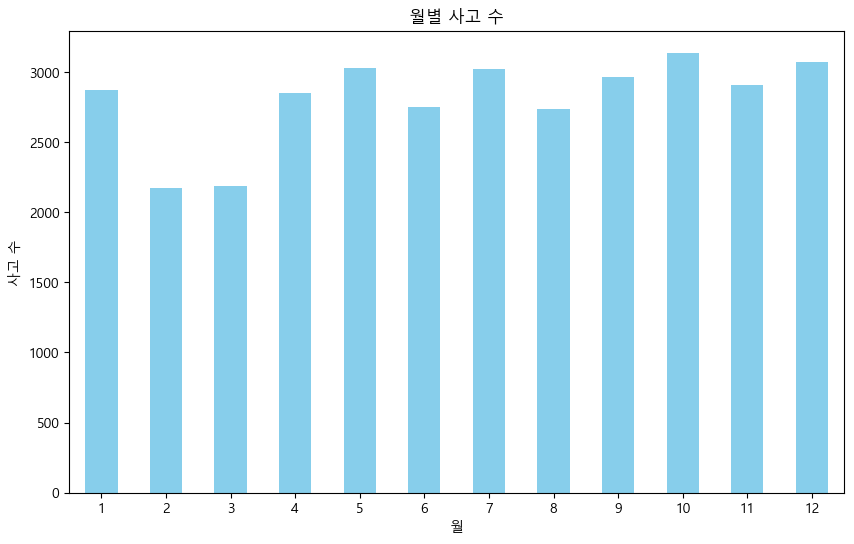

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '서울시교통사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.show()

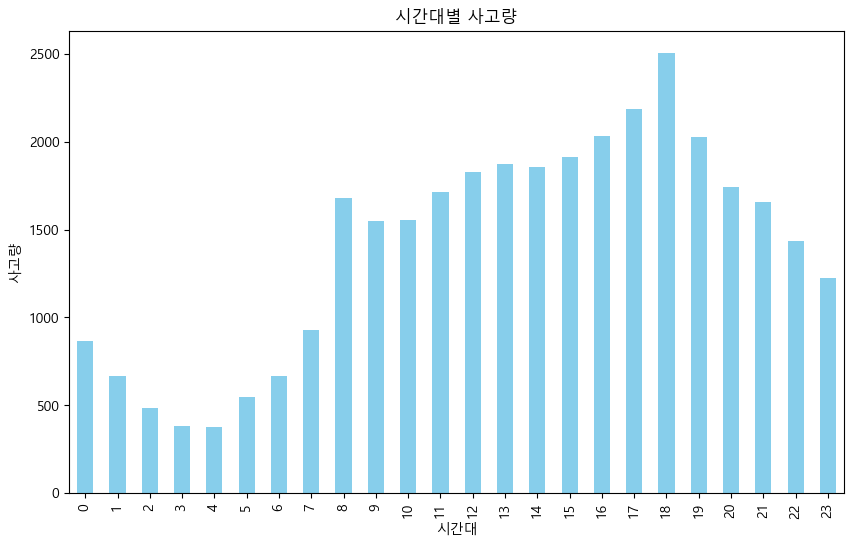

In [9]:

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color='skyblue')
plt.title('시간대별 사고량')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()

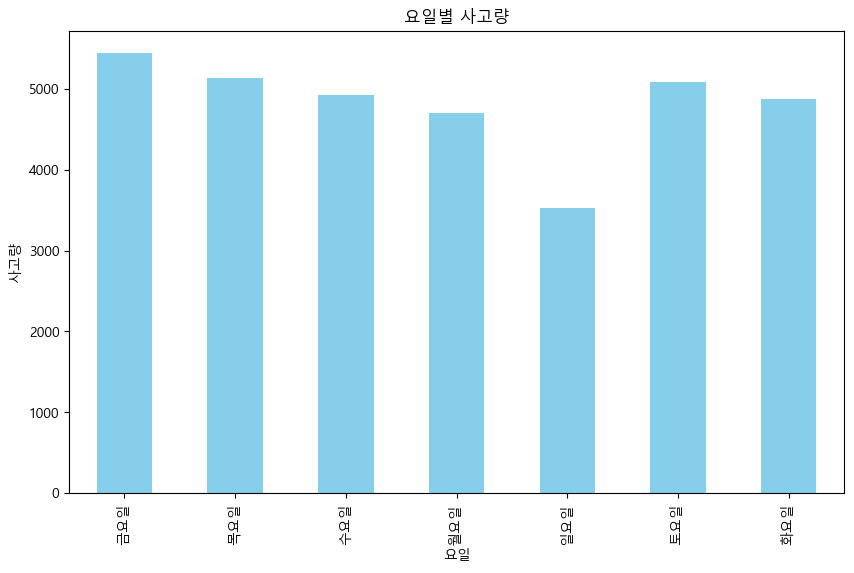

In [10]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '요일' 컬럼을 기준으로 그룹화하여 사고 수 계산
요일별_사고수 = df['요일'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
요일별_사고수.plot(kind='bar', color='skyblue')
plt.title('요일별 사고량')
plt.xlabel('요일')
plt.ylabel('사고량')
plt.show()

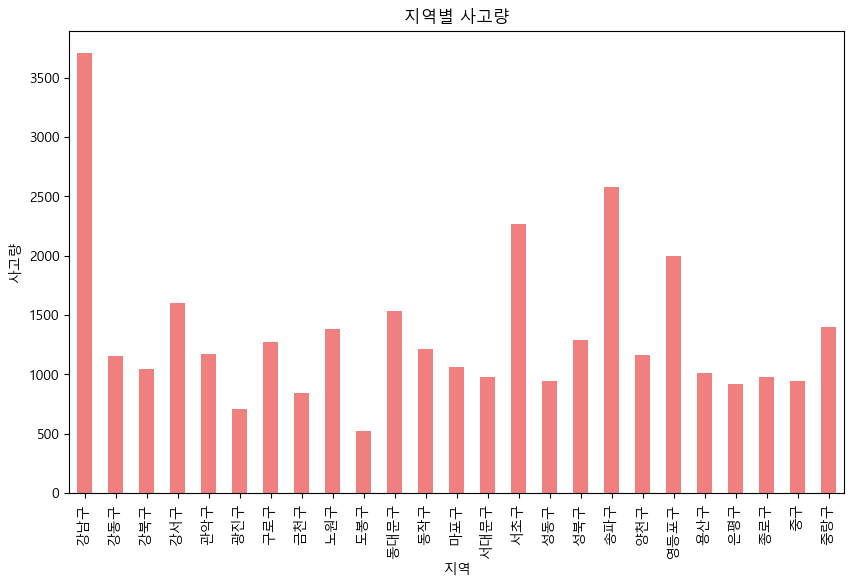

In [14]:
# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['지역'] = df['시군구'].apply(lambda x: x.split()[1])

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
지역별_사고수 = df['지역'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
지역별_사고수.plot(kind='bar', color='lightcoral')
plt.title('지역별 사고량')
plt.xlabel('지역')
plt.ylabel('사고량')
plt.show()

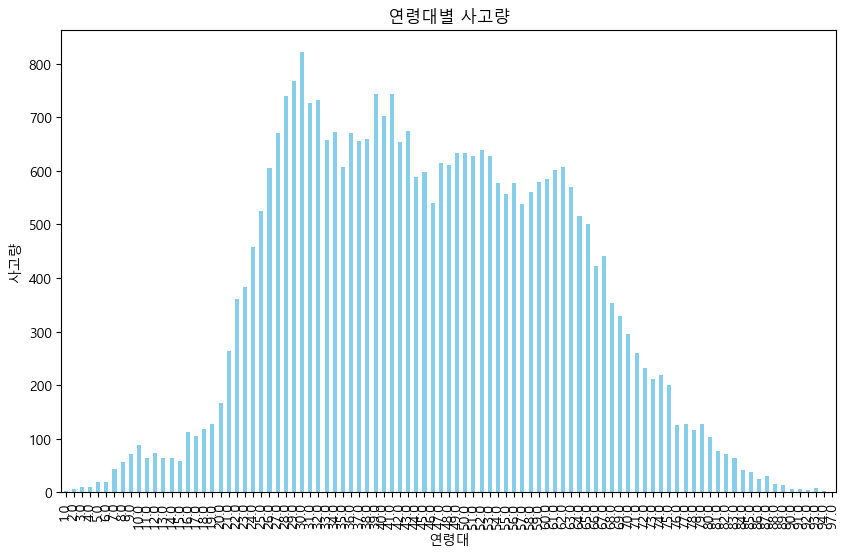

In [15]:
# 피해운전자 연령대 레이블 생성
df['피해자_연령대'] = df['피해운전자 연령'].apply(lambda x: int(x[:-1]) if pd.notna(x) and x[-1] == '세' else None)

# '피해자_연령대' 컬럼을 기준으로 그룹화하여 사고 수 계산
연령대별_사고수 = df['피해자_연령대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
연령대별_사고수.plot(kind='bar', color='skyblue')
plt.title('연령대별 사고량')
plt.xlabel('연령대')
plt.ylabel('사고량')
plt.show()

In [9]:
# 가해자 연령대 레이블 생성
df['피해자_연령'] = df['피해운전자 연령'].apply(lambda x: int(x[:-1]) if x[-1] == '세' else 0)  # 세 제거 후 정수 변환
피해자_연령대 = pd.cut(df['피해자_연령'], bins=[0, 19, 29, 39, 49, 59, 69, 130], labels=['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상'], right=False)

# 가해자 연령대별 사고 수 계산
피해자_연령대별_사고수 = 피해자_연령대.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
피해자_연령대별_사고수.plot(kind='bar', color='skyblue')
plt.title('피해자 연령대별 사고량')
plt.xlabel('피해자 연령대')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

TypeError: 'float' object is not subscriptable

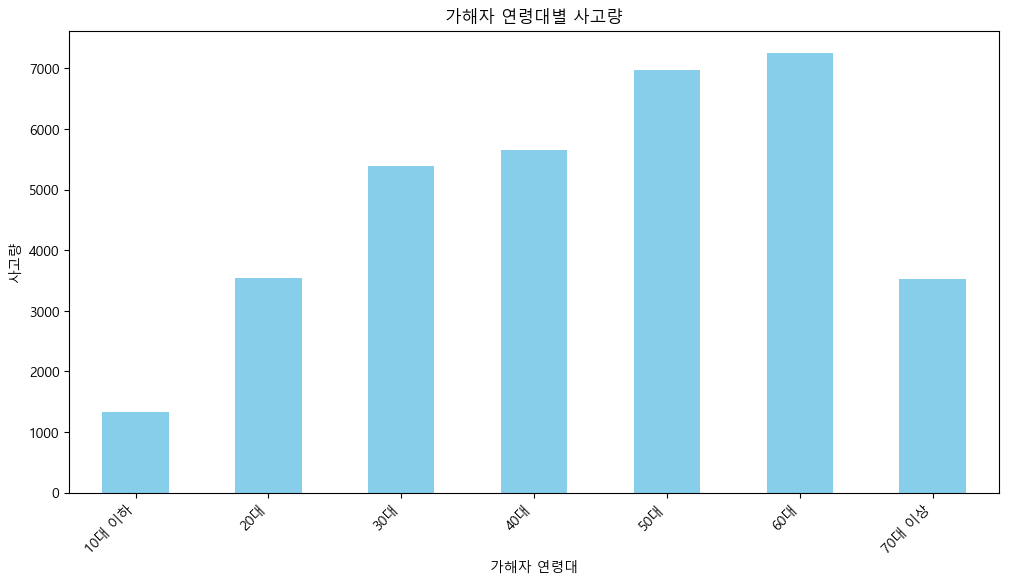

In [16]:
# 가해자 연령대 레이블 생성
df['가해자_연령'] = df['가해운전자 연령'].apply(lambda x: int(x[:-1]) if x[-1] == '세' else 0)  # 세 제거 후 정수 변환
가해자_연령대 = pd.cut(df['가해자_연령'], bins=[0, 19, 29, 39, 49, 59, 69, 130], labels=['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상'], right=False)

# 가해자 연령대별 사고 수 계산
가해자_연령대별_사고수 = 가해자_연령대.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
가해자_연령대별_사고수.plot(kind='bar', color='skyblue')
plt.title('가해자 연령대별 사고량')
plt.xlabel('가해자 연령대')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

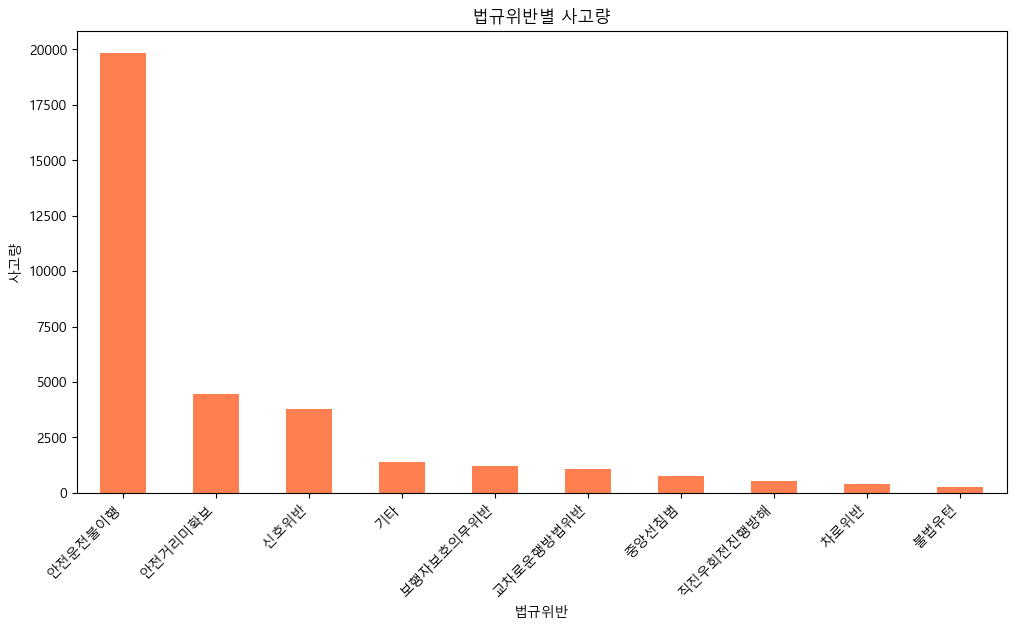

In [17]:
# 법규위반별 사고 수 계산
법규위반별_사고수 = df['법규위반'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
법규위반별_사고수.plot(kind='bar', color='coral')
plt.title('법규위반별 사고량')
plt.xlabel('법규위반')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

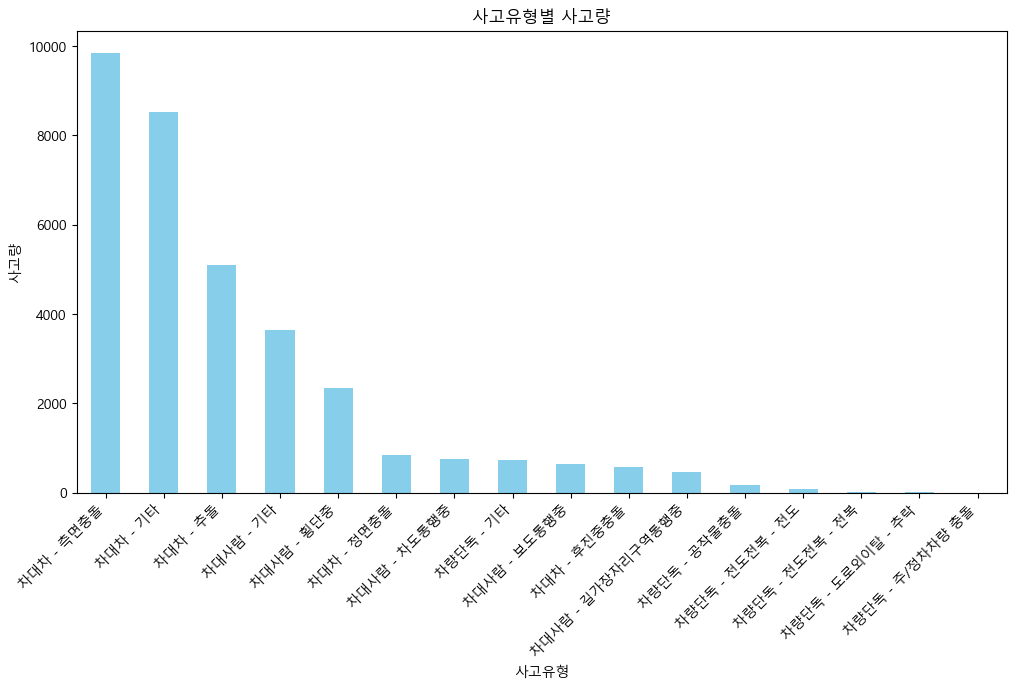

In [18]:
# 사고유형별 사고 수 계산
사고유형별_사고수 = df['사고유형'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
사고유형별_사고수.plot(kind='bar', color='skyblue')
plt.title('사고유형별 사고량')
plt.xlabel('사고유형')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

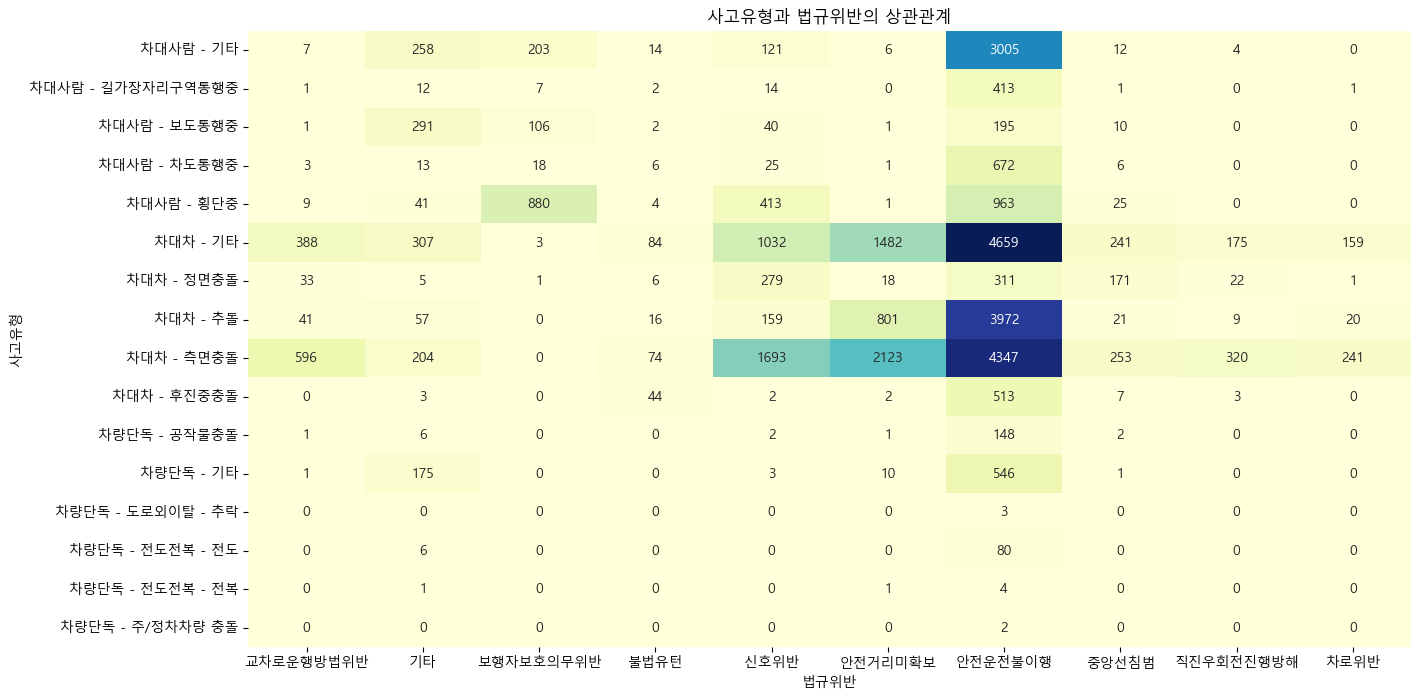

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = './서울시교통사고.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, delimiter=',', encoding='CP949')

# 사고유형과 법규위반의 교차표 생성
cross_table = pd.crosstab(df['사고유형'], df['법규위반'])

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('사고유형과 법규위반의 상관관계')
plt.xlabel('법규위반')
plt.ylabel('사고유형')
plt.show()

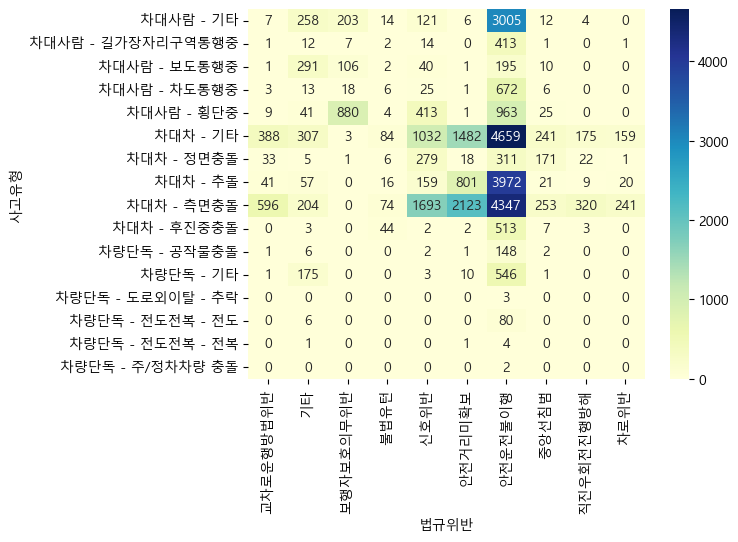

In [20]:
cross_table = pd.crosstab(df['사고유형'], df['법규위반'])
sns.heatmap(cross_table, annot=True, cmap='YlGnBu', fmt="d")
plt.show()

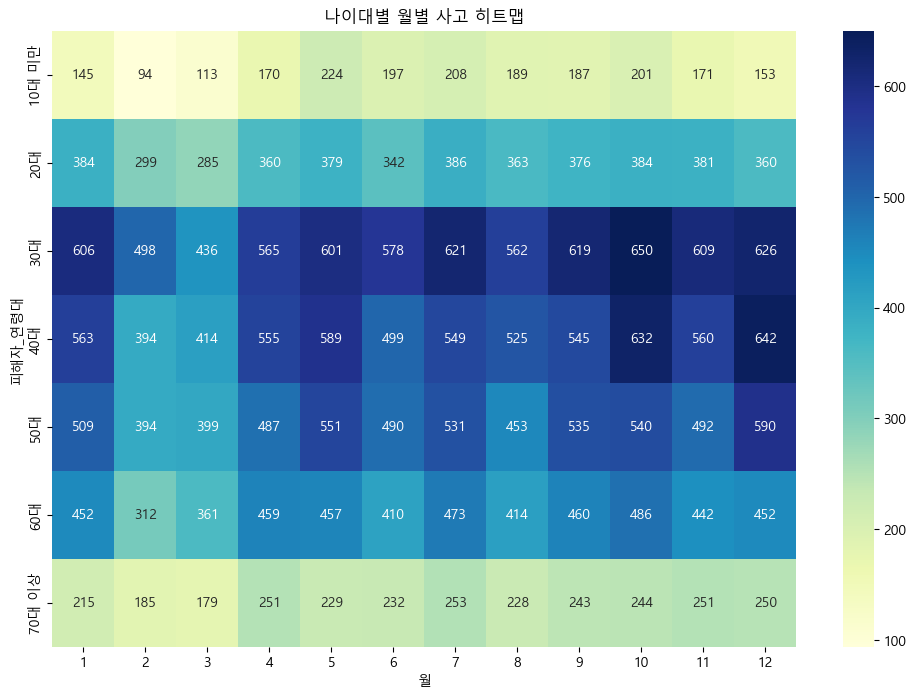

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# '피해운전자 연령' 컬럼의 NaN 값을 0으로 대체
df['피해운전자 연령'].fillna(0, inplace=True)

# 피해자 연령대 레이블 생성
df['피해자_연령'] = df['피해운전자 연령'].apply(lambda x: int(x[:-1]) if isinstance(x, str) and x[-1] == '세' else 0)  # 세 제거 후 정수 변환
df['피해자_연령대'] = pd.cut(df['피해자_연령'], bins=[0, 19, 29, 39, 49, 59, 69, 130], labels=['10대 미만', '20대', '30대', '40대', '50대', '60대', '70대 이상'], right=False)

# 지역 및 월별 사고수를 계산
pivot_table = df.pivot_table(index='피해자_연령대', columns='월', values='사고번호', aggfunc='count', fill_value=0)

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt="d")
plt.title('나이대별 월별 사고 히트맵')
plt.show()


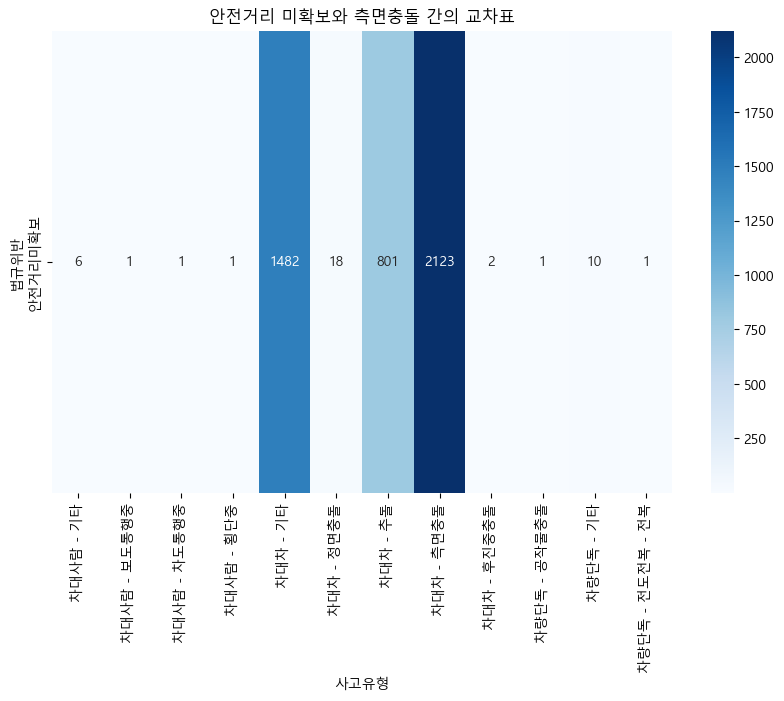

Chi-squared: 0.0
P-value: 1.0


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 데이터 불러오기
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# 안전거리 미확보와 측면충돌에 해당하는 데이터 추출
subset_df = df[df['법규위반'].isin(['안전거리미확보', '측면충돌'])]

# 교차표 생성
contingency_table = pd.crosstab(subset_df['법규위반'], subset_df['사고유형'])

# 카이제곱 검정
chi2, p, _, _ = chi2_contingency(contingency_table)

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('안전거리 미확보와 측면충돌 간의 교차표')
plt.show()

# 카이제곱 검정 결과 출력
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\3757723055.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='월', y='측면충돌사고수', data=monthly_accidents, palette='viridis')


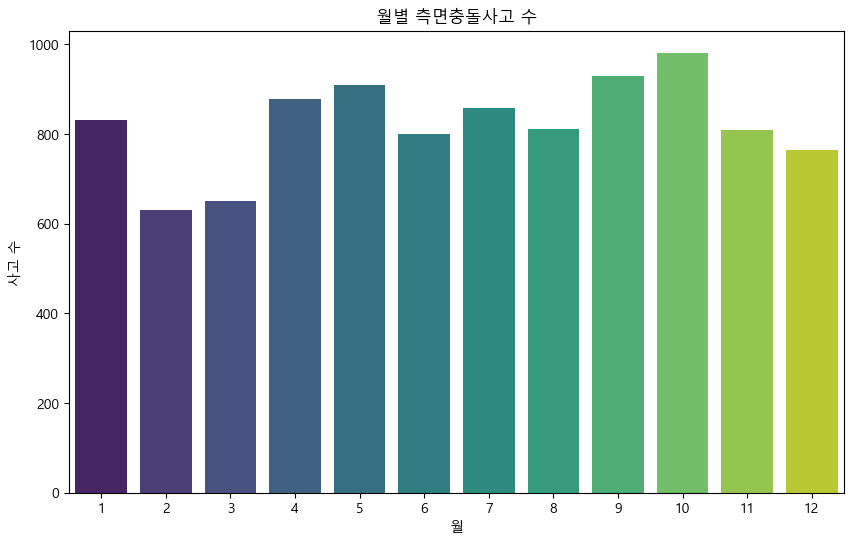

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# '월'과 '사고유형'으로 필터링하여 데이터프레임 생성
monthly_accidents = df[df['사고유형'] == '차대차 - 측면충돌'].groupby('월').size().reset_index(name='측면충돌사고수')

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='월', y='측면충돌사고수', data=monthly_accidents, palette='viridis')
plt.title('월별 측면충돌사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.show()

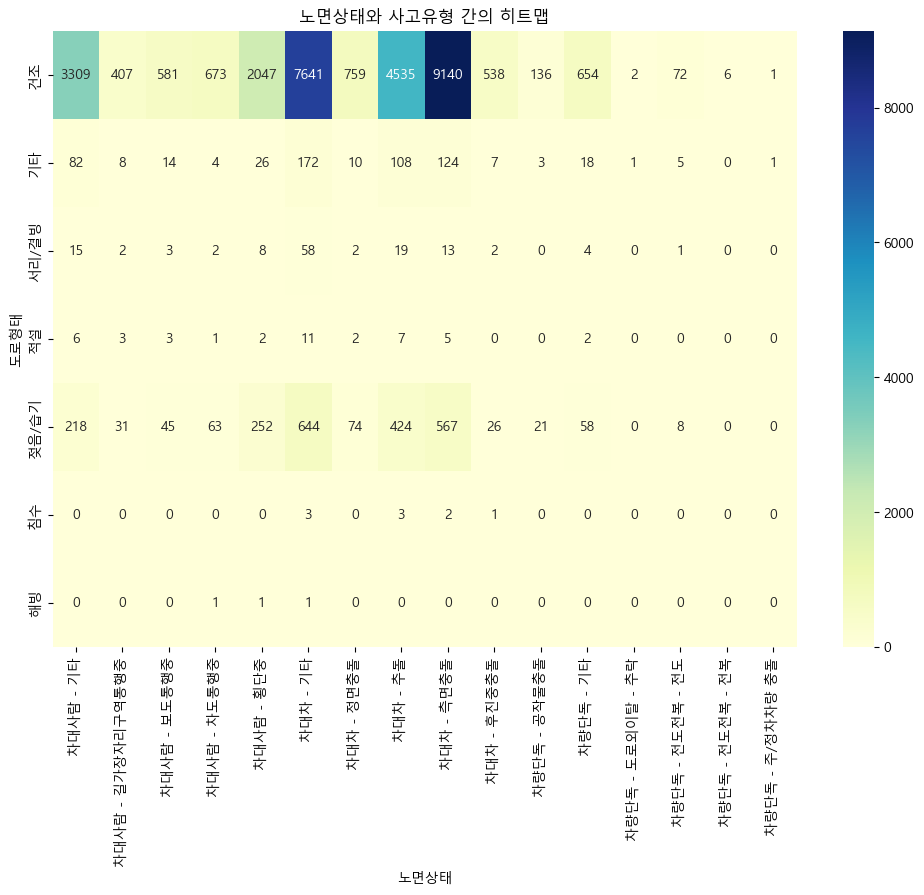

In [24]:
# '도로형태'와 '사고유형'으로 필터링하여 교차표 생성
cross_table = pd.crosstab(df['노면상태'], df['사고유형'])

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('노면상태와 사고유형 간의 히트맵')
plt.xlabel('노면상태')
plt.ylabel('도로형태')
plt.show()

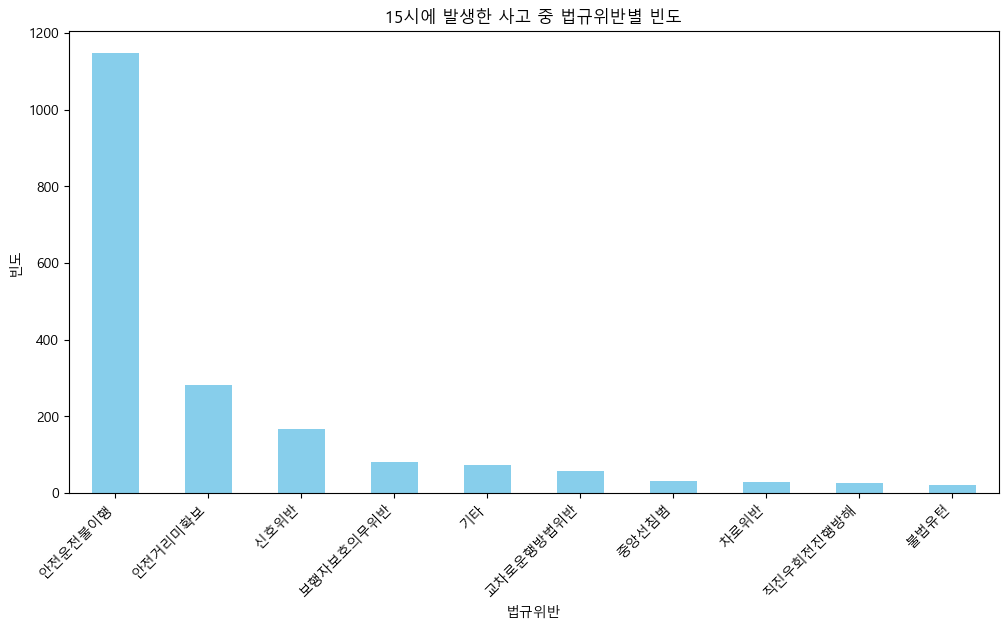

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 15시에 일어난 사고만 필터링
df_15시 = df[df['사고일시'].dt.hour == 15]

# 15시에 일어난 사고 중 법규위반의 빈도수 계산
법규위반_빈도 = df_15시['법규위반'].value_counts()

# 막대그래프 시각화
plt.figure(figsize=(12, 6))
법규위반_빈도.plot(kind='bar', color='skyblue')
plt.title('15시에 발생한 사고 중 법규위반별 빈도')
plt.xlabel('법규위반')
plt.ylabel('빈도')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

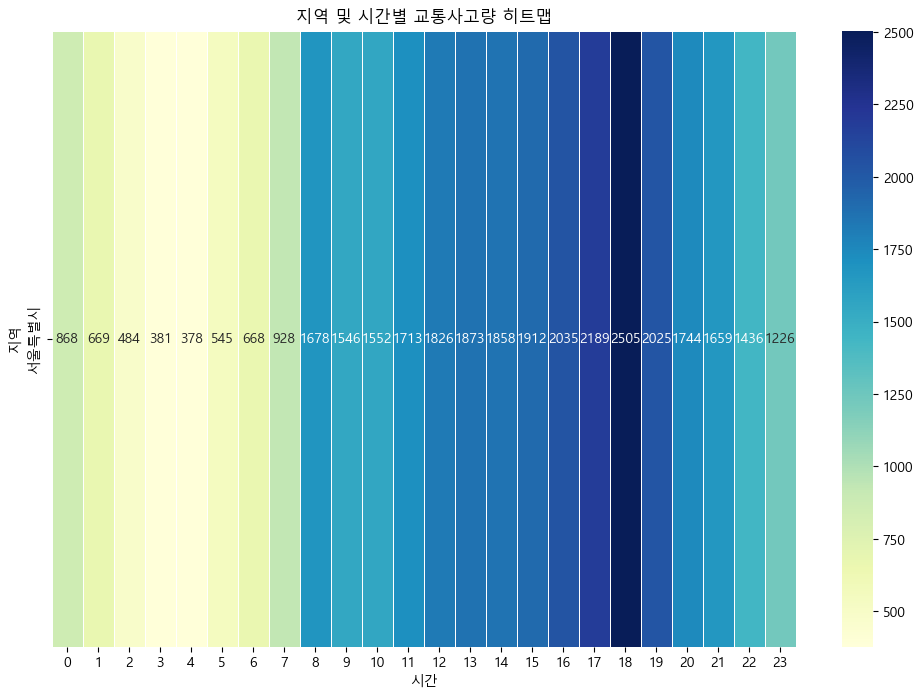

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 시간과 지역 추출
df['시간'] = df['사고일시'].dt.hour
df['지역'] = df['시군구'].str.split(' ').str[0]

# 지역에 대한 교통사고량 계산
heatmap_data = df.groupby(['지역', '시간']).size().unstack(fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('지역 및 시간별 교통사고량 히트맵')
plt.xlabel('시간')
plt.ylabel('지역')
plt.show()

In [28]:
import pandas as pd

# 데이터 불러오기
file_path = '서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '시'로 끝나는 부분만 추출
cities_ending_with_si = df['시군구'].str.extract(r'서울특별시\s*([가-힣]+구)')

# 중복 제거
cities_ending_with_si = cities_ending_with_si.dropna()[0].unique()

# 결과 출력
print(cities_ending_with_si)


['중구' '송파구' '금천구' '강동구' '강남구' '용산구' '강서구' '관악구' '은평구' '마포구' '중랑구' '강북구'
 '영등포구' '동작구' '노원구' '도봉구' '동대문구' '구로구' '서대문구' '성동구' '서초구' '종로구' '성북구'
 '양천구' '광진구']


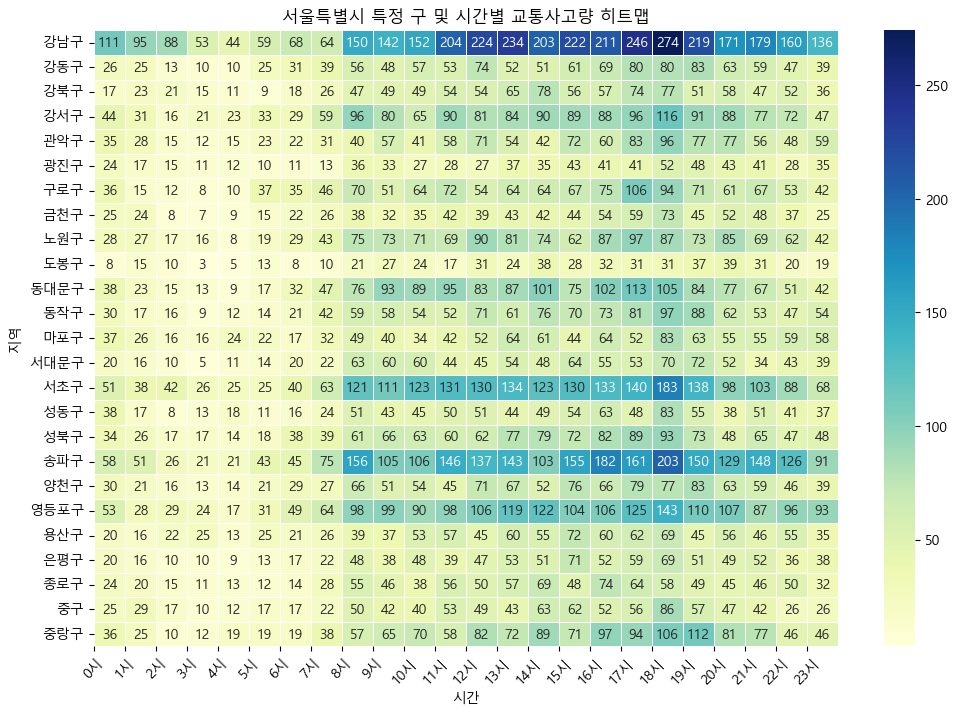

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 각 구에 해당하는 데이터프레임 생성
dfs_by_gu = {gu: df[df['시군구'].str.contains(gu)] for gu in cities_ending_with_si}

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 각 구의 데이터프레임에 대해 그룹화하여 교통사고량 계산 후 행과 열을 바꿔줍니다.
heatmap_data = pd.DataFrame({gu: df_gu.groupby(df_gu['사고일시'].dt.hour).size() for gu, df_gu in dfs_by_gu.items()}).transpose()

# 지역을 가나다순으로 정렬
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.index))

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('서울특별시 특정 구 및 시간별 교통사고량 히트맵')
plt.xlabel('시간')
plt.ylabel('지역')

# x축 레이블을 조절
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=[f"{hour}시" for hour in heatmap_data.columns], rotation=45)

plt.show()


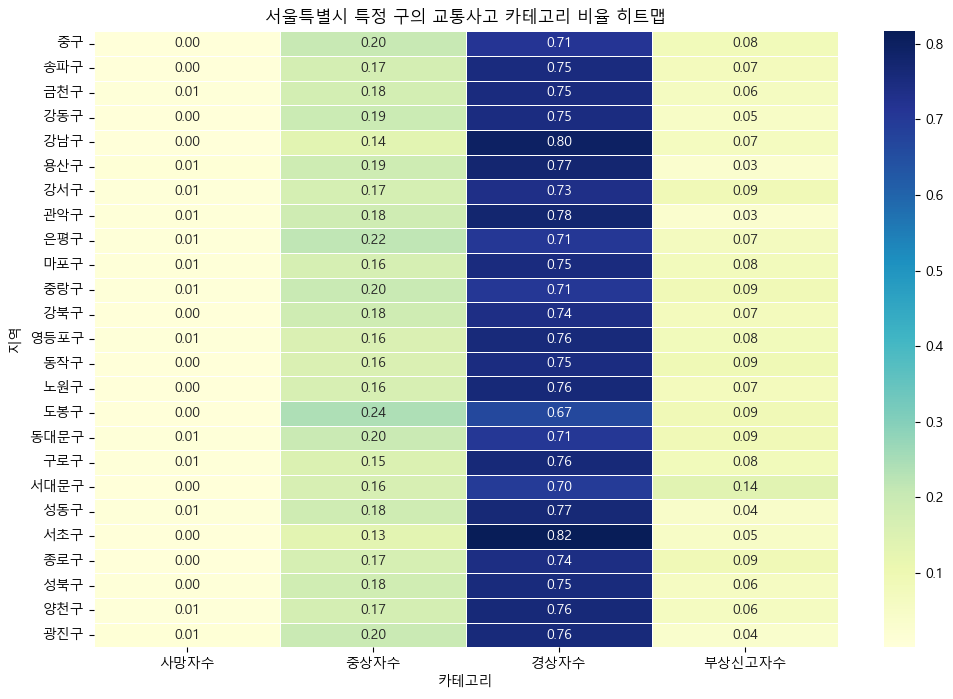

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 각 구에 해당하는 데이터프레임 생성
dfs_by_gu = {gu: df[df['시군구'].str.contains(gu)] for gu in cities_ending_with_si}

# 각 구별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
totals_by_gu = pd.DataFrame({gu: df_gu[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum() for gu, df_gu in dfs_by_gu.items()}).transpose()

# 각 카테고리를 합으로 나누어 비율 계산
ratios_by_gu = totals_by_gu.div(totals_by_gu.sum(axis=1), axis=0)

# 비율 히트맵 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(ratios_by_gu, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('서울특별시 특정 구의 교통사고 카테고리 비율 히트맵')
plt.xlabel('카테고리')
plt.ylabel('지역')

plt.show()


<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\3816203896.py:20: SyntaxWarning: invalid escape sequence '\d'
  df_gu['가해운전자 연령'] = pd.to_numeric(df_gu['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\3816203896.py:29: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\3816203896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

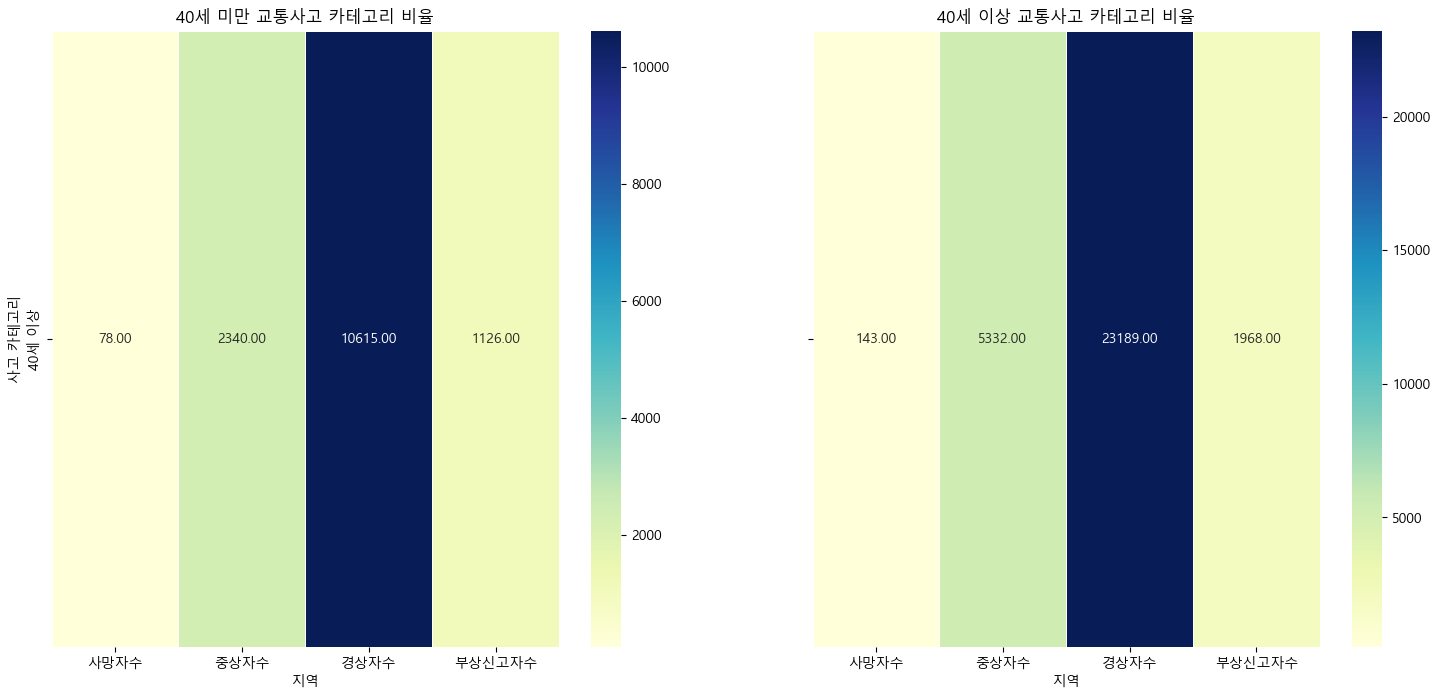

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 각 구에 해당하는 데이터프레임 생성
dfs_by_gu = {gu: df[df['시군구'].str.contains(gu)] for gu in cities_ending_with_si}

# 나이에서 숫자만 추출하되, 숫자 뒤에 "세"가 붙은 경우 고려
for gu, df_gu in dfs_by_gu.items():
    df_gu['가해운전자 연령'] = pd.to_numeric(df_gu['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')

# 각 구별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
totals_by_gu = pd.DataFrame({gu: df_gu[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum() for gu, df_gu in dfs_by_gu.items()}).transpose()

# 각 카테고리를 합으로 나누어 비율 계산
ratios_by_gu = totals_by_gu.div(totals_by_gu.sum(axis=1), axis=0)

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df_age_grouped = df.groupby(age_group_col)

# 각 그룹에 대해 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
totals_by_age_group = pd.DataFrame({age_group: df_group[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum() for age_group, df_group in df_age_grouped})

# 비율 히트맵 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
for i, age_group in enumerate(['40세 미만', '40세 이상']):
    sns.heatmap(totals_by_age_group[age_group].to_frame().T, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, ax=axes[i])
    axes[i].set_title(f'{age_group} 교통사고 카테고리 비율')
    axes[i].set_xlabel('지역')

axes[0].set_ylabel('사고 카테고리')
plt.show()


<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\772982645.py:22: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_16880\772982645.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_grouped = df.groupby(age_group_col)


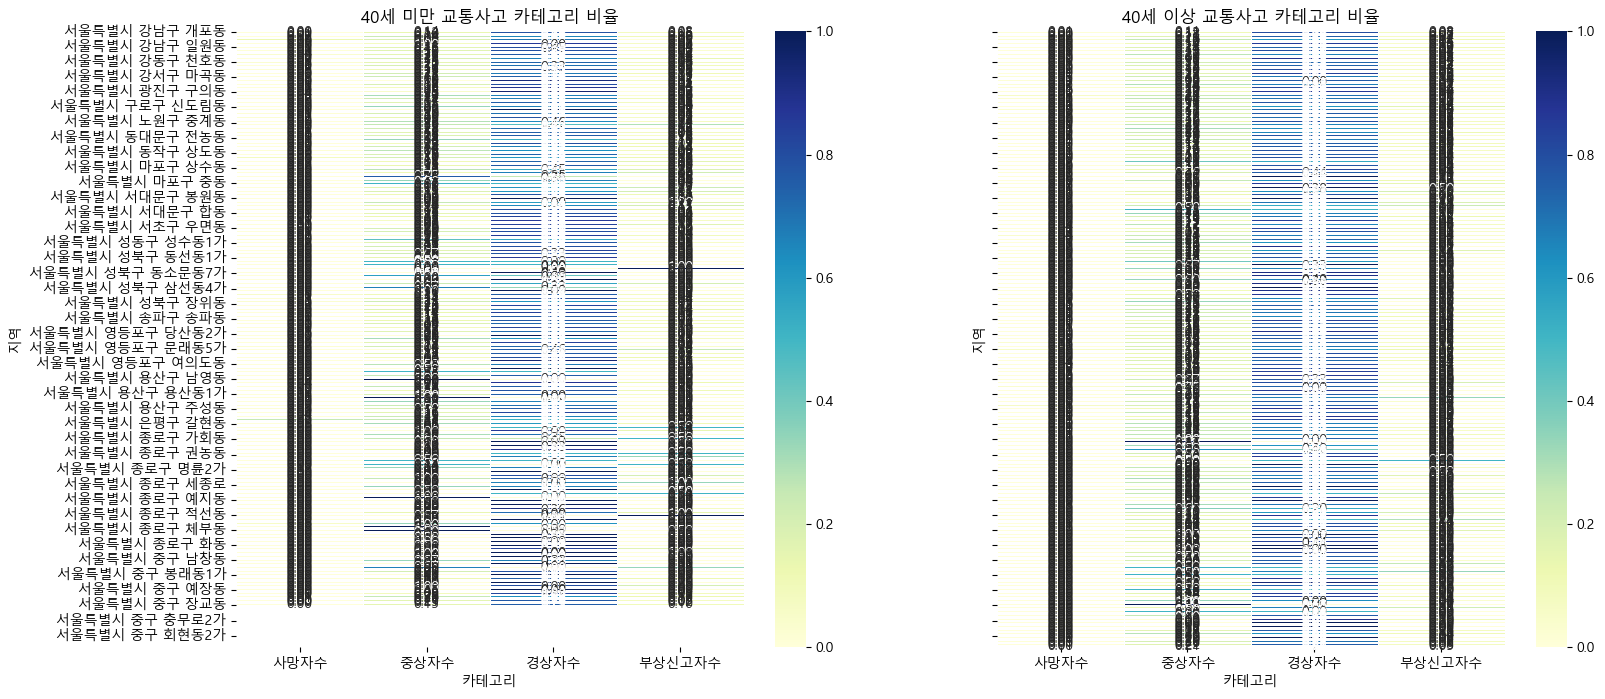

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 각 구에 해당하는 데이터프레임 생성
dfs_by_gu = {gu: df[df['시군구'].str.contains(gu)] for gu in cities_ending_with_si}

# 각 구별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
totals_by_gu = pd.DataFrame({gu: df_gu[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum() for gu, df_gu in dfs_by_gu.items()}).transpose()

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df_age_grouped = df.groupby(age_group_col)

# 각 카테고리를 합으로 나누어 비율 계산
ratios_by_gu_age = {}

for age_group, age_df in df_age_grouped:
    ratios_by_gu_age[age_group] = age_df.groupby('시군구')[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum().div(
        age_df.groupby('시군구')[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum().sum(axis=1), axis=0)

# 비율 히트맵 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

for i, age_group in enumerate(['40세 미만', '40세 이상']):
    sns.heatmap(ratios_by_gu_age[age_group], cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, ax=axes[i])
    axes[i].set_title(f'{age_group} 교통사고 카테고리 비율')
    axes[i].set_xlabel('카테고리')
    axes[i].set_ylabel('지역')

plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\2659055056.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\2659055056.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratios_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum().div(
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\2659055056.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sil

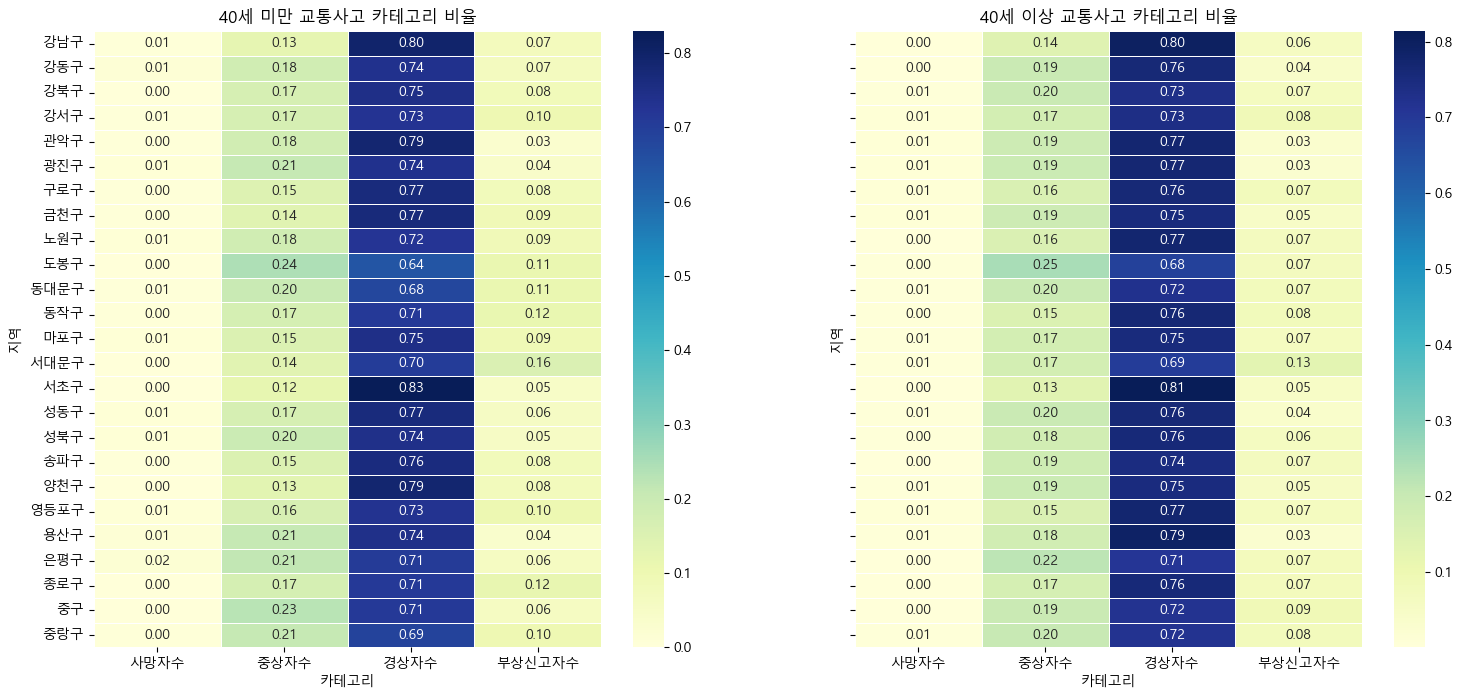

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df['나이그룹'] = age_group_col

# '구' 컬럼 추가
df['구'] = df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# 각 나이 그룹별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
ratios_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum().div(
    df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum().sum(axis=1), axis=0)

# 비율 히트맵 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

for i, age_group in enumerate(['40세 미만', '40세 이상']):
    sns.heatmap(ratios_by_gu_age.loc[age_group], cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, ax=axes[i])
    axes[i].set_title(f'{age_group} 교통사고 카테고리 비율')
    axes[i].set_xlabel('카테고리')
    axes[i].set_ylabel('지역')

plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3266277820.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3266277820.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum()


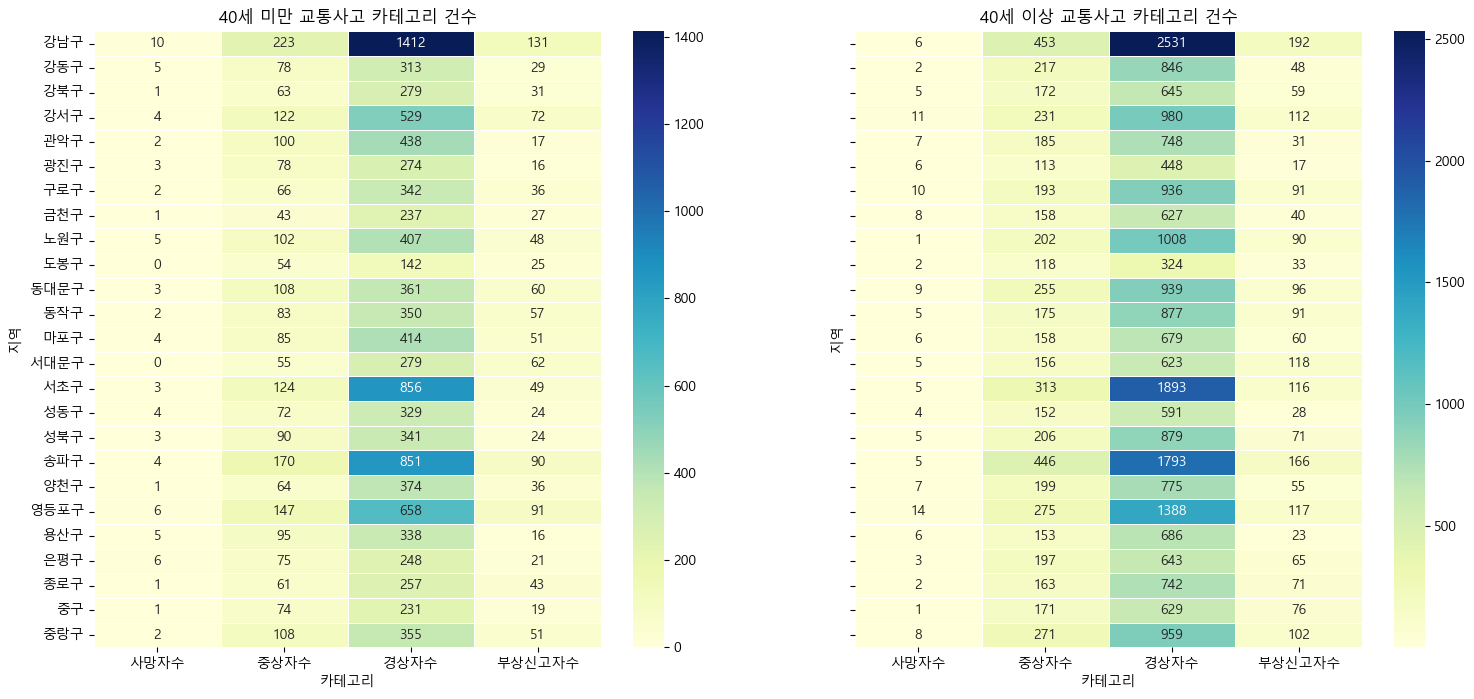

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df['나이그룹'] = age_group_col

# '구' 컬럼 추가
df['구'] = df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# 각 나이 그룹별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
accident_counts_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum()

# 히트맵 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

for i, age_group in enumerate(['40세 미만', '40세 이상']):
    sns.heatmap(accident_counts_by_gu_age.loc[age_group], cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, ax=axes[i])
    axes[i].set_title(f'{age_group} 교통사고 카테고리 건수')
    axes[i].set_xlabel('카테고리')
    axes[i].set_ylabel('지역')

plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\1028401447.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\1028401447.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum()
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\1028401447.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

        사망자수  중상자수   경상자수  부상신고자수
나이그룹                             
40세 미만    78  2340  10615    1126
40세 이상   143  5332  23189    1968


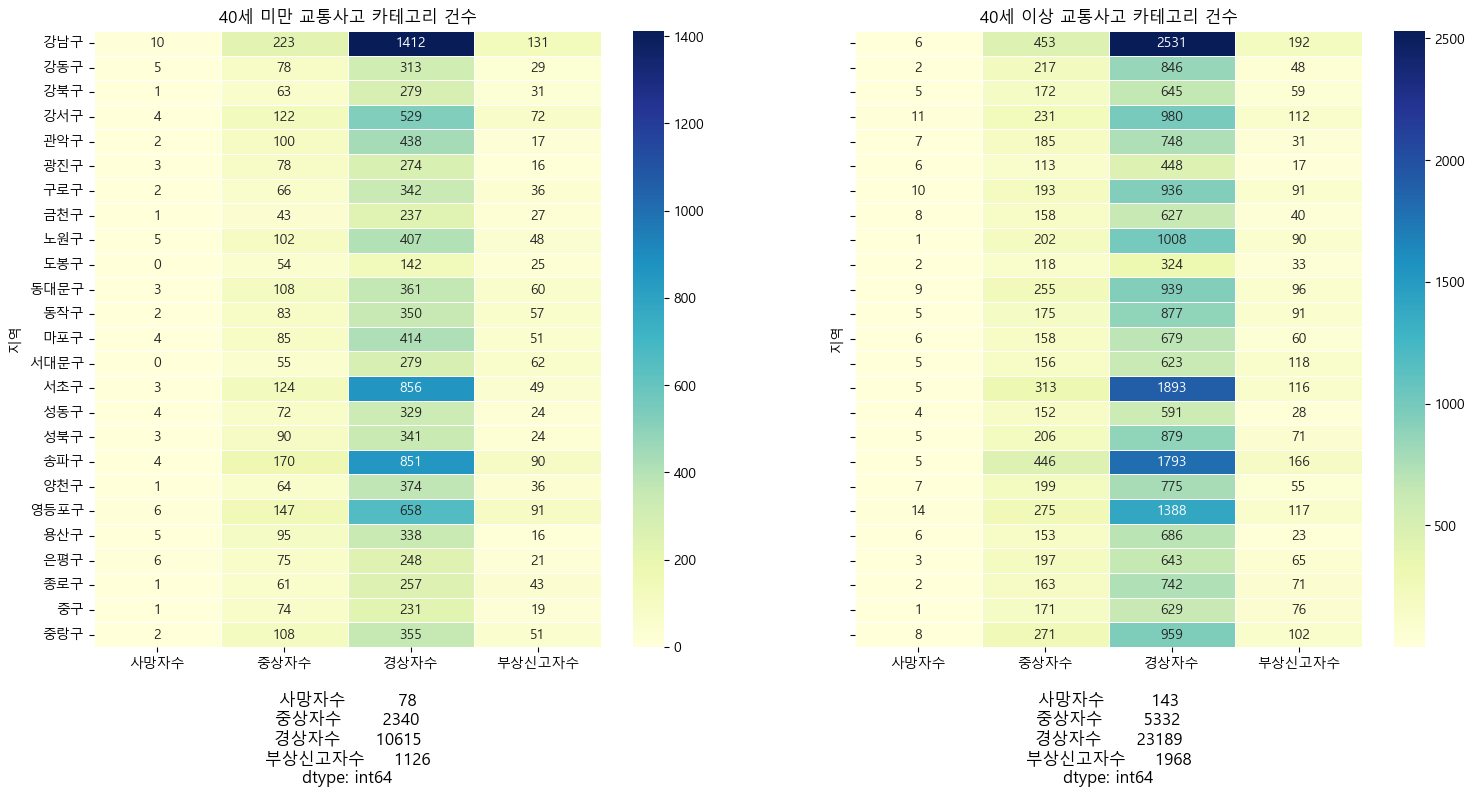

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df['나이그룹'] = age_group_col

# '구' 컬럼 추가
df['구'] = df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# 각 나이 그룹별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
accident_counts_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum()

# 히트맵 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

for i, age_group in enumerate(['40세 미만', '40세 이상']):
    sns.heatmap(accident_counts_by_gu_age.loc[age_group], cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, ax=axes[i])

    # Add a row for total accident counts
    total_counts = accident_counts_by_gu_age.loc[age_group].sum()
    axes[i].text(0.5, -0.15, f'{total_counts}', fontsize=12, ha='center', va='center', transform=axes[i].transAxes)

    axes[i].set_title(f'{age_group} 교통사고 카테고리 건수')
    axes[i].set_ylabel('지역')

# Display total accident counts in a table
total_counts_table = accident_counts_by_gu_age.groupby('나이그룹').sum()
print(total_counts_table)
plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3309188272.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3309188272.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum()
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3309188272.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

        사망자수  중상자수   경상자수  부상신고자수
나이그룹                             
40세 미만    78  2340  10615    1126
40세 이상   143  5332  23189    1968


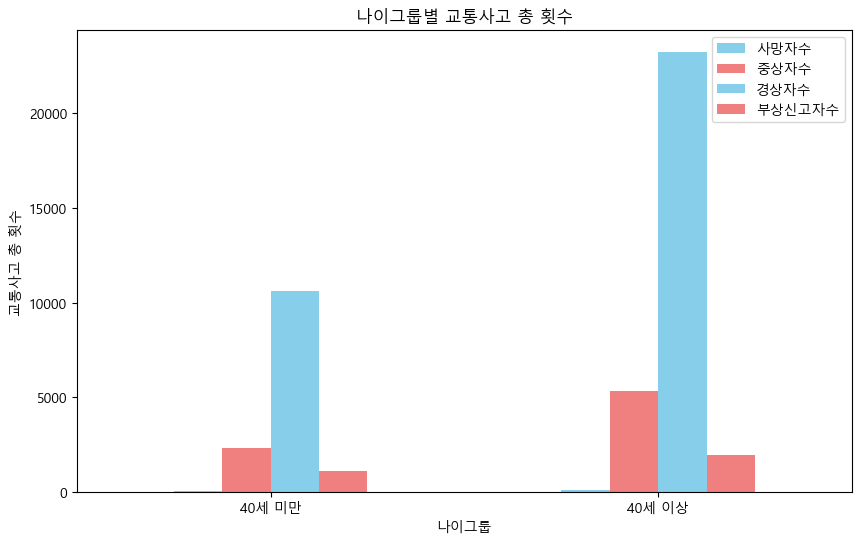

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df['나이그룹'] = age_group_col

# '구' 컬럼 추가
df['구'] = df['시군구'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# 각 나이 그룹별로 사망자수, 중상자수, 경상자수, 부상신고자수를 계산
accident_counts_by_gu_age = df.groupby(['나이그룹', '구'])[['사망자수', '중상자수', '경상자수', '부상신고자수']].sum()

# Display total accident counts in a table
total_counts_table = accident_counts_by_gu_age.groupby('나이그룹').sum()
print(total_counts_table)

# Plot total accident counts for each age group
total_counts_table.plot(kind='bar', rot=0, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('나이그룹별 교통사고 총 횟수')
plt.xlabel('나이그룹')
plt.ylabel('교통사고 총 횟수')
plt.show()


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\1122954926.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\1122954926.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts_by_age = df.groupby('나이그룹').size()


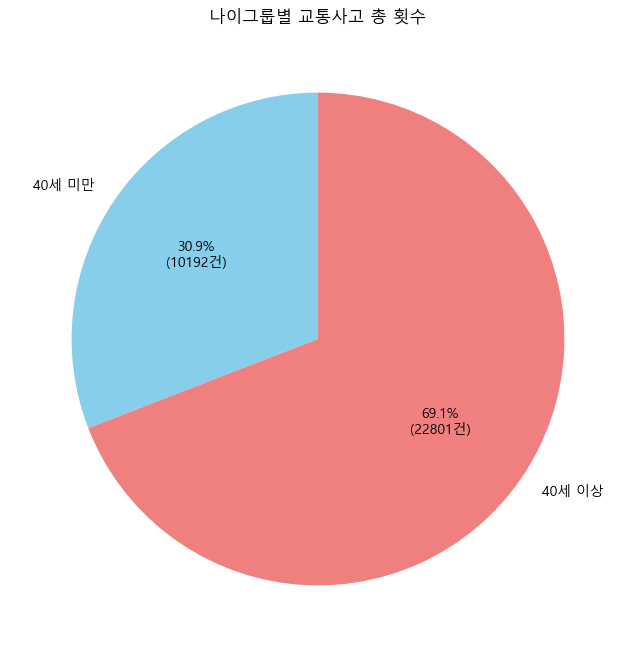

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 40, float('inf')], labels=['40세 미만', '40세 이상'], right=False)
df['나이그룹'] = age_group_col

# 40세 미만, 40세 이상인 경우의 모든 사고의 수를 합산
accident_counts_by_age = df.groupby('나이그룹').size()

# 파이차트로 그리기
plt.figure(figsize=(8, 8))
plt.pie(accident_counts_by_age, labels=accident_counts_by_age.index, autopct=lambda p: '{:.1f}%\n({:.0f}건)'.format(p, p/100*accident_counts_by_age.sum()), startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('나이그룹별 교통사고 총 횟수')
plt.show()


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3148435986.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
C:\Users\kkt82\AppData\Local\Temp\ipykernel_9520\3148435986.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts_by_age = df.groupby('나이그룹').size()


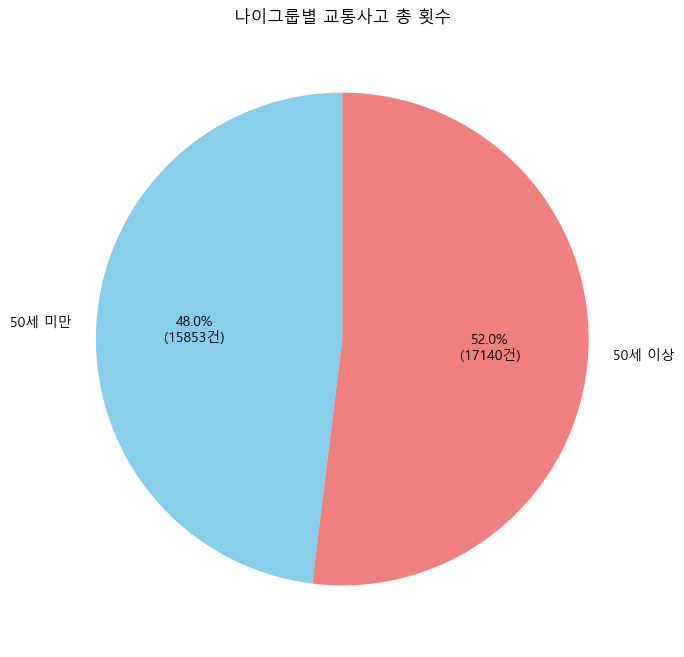

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = './서울시교통사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 나이를 숫자로 변환하고 40세 이상과 40세 미만으로 나이 그룹 나누기
df['가해운전자 연령'] = pd.to_numeric(df['가해운전자 연령'].str.extract('(\d+)(?=세)', expand=False), errors='coerce')
age_group_col = pd.cut(df['가해운전자 연령'], bins=[0, 50, float('inf')], labels=['50세 미만', '50세 이상'], right=False)
df['나이그룹'] = age_group_col

# 40세 미만, 40세 이상인 경우의 모든 사고의 수를 합산
accident_counts_by_age = df.groupby('나이그룹').size()

# 파이차트로 그리기
plt.figure(figsize=(8, 8))
plt.pie(accident_counts_by_age, labels=accident_counts_by_age.index, autopct=lambda p: '{:.1f}%\n({:.0f}건)'.format(p, p/100*accident_counts_by_age.sum()), startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('나이그룹별 교통사고 총 횟수')
plt.show()
